# Clustering Algorithm: K-Means

**K-Means** is one of simple clustering algorithm which belongs to *unsupervised learning*. As a reminder, the unsupervised learning is all about understanding how to group data either:

1. When we don't have labels to predict. An example of it would be determining customer segments. We may don't have a label but intuition about how many segments that reasonably exist in our customer.
2. When we are not trying to predict a label, but rather group the data together for some reason. Take an example when we have tons of data and we want to condense it down to only use number of features.

Among other clustering algorithms, the simplest may be this **K-Means** algorithm. Some use cases where we want to try K-Means is to group books for recommendation or deduplication of items (articles/movies to be recommended).

![](../../assets/img/kmeans.png)

## K-Means in Scikit-learn

In this notebook, we will use `scikit-learn` to implement K-Means. The name of the class is `KMeans`. In order to use the class, we better pass 2 arguments which depends on the data and cases we're trying to solve. Those arguments are for parameters:

- `n_cluster`
- `random_state`

The `n_cluster` are necessary since it depends on the case and/or the dataset we use. The `random_state` is in fact optional, but it's good to set the `random_state` so that we can produce the same result every time we run the code.

In [1]:
# import things

import matplotlib.pyplot as plt # import matplotlib here
import numpy as np # import numpy here
import pandas as pd # import pandas here
from sklearn.cluster import KMeans # import kmeans from scikit-learn

In [4]:
# Load dataset
tracks = pd.read_csv("GPS Trajectory/go_track_tracks.csv")# load the tracks dataset
print("dataset shape:", tracks.shape) # print the shape of the data inside print function
display(tracks.head()) # show first 10 rows of the data
display(tracks.info()) # show some information of the data
display(tracks.describe()) # show some statistics summaries of the data

dataset shape: (163, 10)


,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
id                163 non-null int64
id_android        163 non-null int64
speed             163 non-null float64
time              163 non-null float64
distance          163 non-null float64
rating            163 non-null int64
rating_bus        163 non-null int64
rating_weather    163 non-null int64
car_or_bus        163 non-null int64
linha             80 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 12.9+ KB


None

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,15607.650307,7.386503,16.704738,0.264272,5.302411,2.515337,0.386503,0.515337,1.466258
std,18644.257138,7.348742,16.016168,0.292731,7.639011,0.679105,0.687859,0.841485,0.500397
min,1.000000,0.000000,0.009779,0.002175,0.001000,1.000000,0.000000,0.000000,1.000000
25%,48.500000,1.000000,1.591016,0.035978,0.034500,2.000000,0.000000,0.000000,1.000000
50%,158.000000,4.000000,16.685368,0.214466,3.995000,3.000000,0.000000,0.000000,1.000000
75%,37991.000000,10.000000,23.915760,0.390572,7.333000,3.000000,1.000000,1.000000,2.000000
max,38092.000000,27.000000,96.206029,1.942948,55.770000,3.000000,3.000000,2.000000,2.000000


In [6]:
# use only columns ["id", "id_android", "speed", "distance"]
data = tracks[["id", "id_android", "speed", "distance"]]

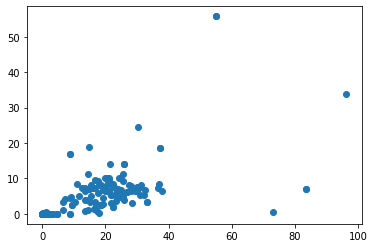

In [7]:
# plot the data with x-axis is speed, y-axis is distance
plt.scatter(data['speed'], data['distance'])

In [56]:
# convert dataframe to numpy array
X = np.array(data[['speed', 'distance']])

In [62]:
# define the KMeans instance
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=111).fit(X)

In [63]:
# print the centers for each clusters
print(kmeans.cluster_centers_)

[[22.82972069  6.90296703]
 [ 3.02404178  1.15501515]
 [74.29682468 26.64866667]]


In [64]:
# add cluster labels to dataframe
data['Clusters'] = kmeans.labels_

/Users/d-wdj/miniconda3/envs/h8/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
set(data['Clusters'])

{0, 1, 2}

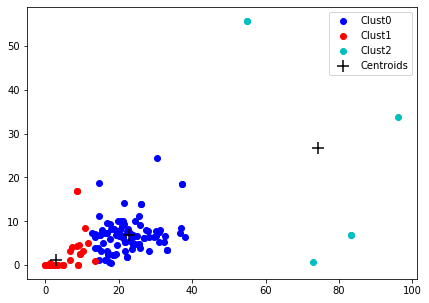

In [86]:
# visualize kmeans results
color = {n: c for n, c in enumerate(['b', 'r', 'c' ,'r','m', 'k', 'y', '#FFC0CB'])}
fig = plt.figure(figsize=(7,5))
for i in range(n_clusters):
    plt.scatter(data[data['Clusters'] == i]['speed'], 
                data[data['Clusters'] == i]['distance'],
                c=color[i], label=f'Clust{i}')
plt.scatter(centers[:,0], centers[:,1], c='k', marker='+', s=150, alpha=1, label='Centroids')
plt.legend()

## So, how does K-means work?

Before fitting the KMeans model, we need to set some the number of clusters, `K`. This number will also determine the number of **center of clusters**, called **centroids** to be assigned. Here's one method for computing k-means:

1. Randomly place `k` centroids amongst the data

2. Then, within a loop until **convergence**, perform the following steps:

    2.1 Assign each point to the closest centroids
    
    2.2 Move the centroids to the center of the points assigned to it

## How about the metrics?

Since k-means is unsupervised technique, we need to do some workaround to measure the performance. The tangible way is to use **elbow method** with **scree plot**.

In [104]:
# plot kmeans properties, `intertia_`
inertiaScore = []
for nc in range(1, 31):
    kmeans = KMeans(n_clusters=nc, random_state=111).fit(X)
    inertiaScore.append(kmeans.inertia_)
# kmeans.inertia_

In [110]:
len(inertiaScore)

30

Text(0, 0.5, 'Inertia Score')

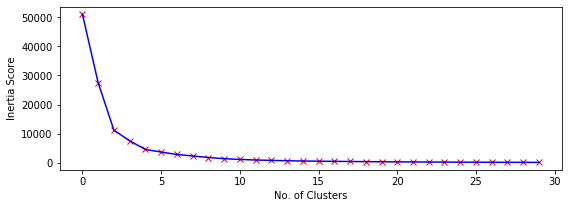

In [109]:
fig = plt.figure(figsize=(9, 3))
plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia Score')

In [144]:
from sklearn.datasets import make_blobs, make_circles, make_moons

In [123]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=.7, 
                  shuffle=True, random_state=0)

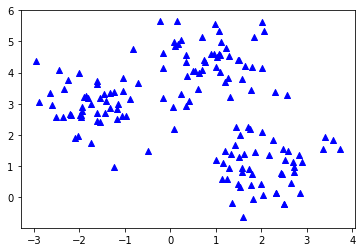

In [124]:
plt.scatter(X[:,0], X[:, 1], c='blue', marker='^')

In [125]:
inertiaScore = []
for nc in range(1, 11):
    kmeans = KMeans(n_clusters=nc, random_state=111).fit(X)
    inertiaScore.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia Score')

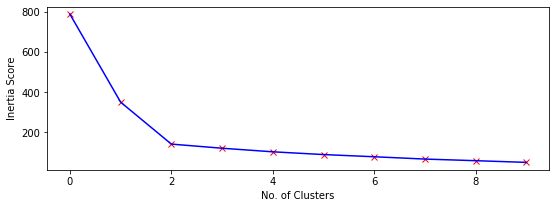

In [126]:
fig = plt.figure(figsize=(9, 3))
plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia Score')

In [171]:
X, y = make_circles(n_samples=150, random_state=111, factor=.5, noise=0.03)

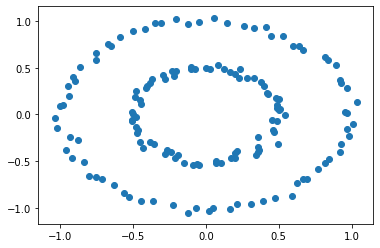

In [169]:
plt.scatter(X[:, 0], X[:, 1])

Text(0, 0.5, 'Inertia Score')

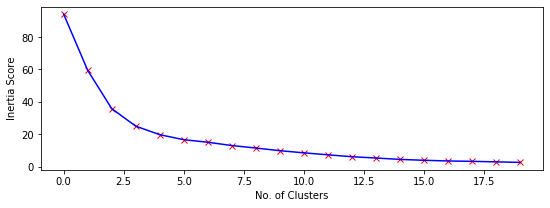

In [166]:
inertiaScore = []
for nc in range(1, 21):
    kmeans = KMeans(n_clusters=nc).fit(X)
    inertiaScore.append(kmeans.inertia_)
fig = plt.figure(figsize=(9, 3))
plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia Score')

(150, 4)


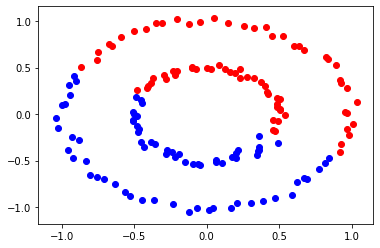

In [174]:
kmeans = KMeans(n_clusters=2).fit(X)
X = np.concatenate((X, np.array(kmeans.labels_)[:, None]), axis=1)

print (X.shape)
plt.scatter(X[X[:, 2]==1, 0], X[X[:, 2]==1, 1], c='r')
plt.scatter(X[X[:, 2]==0, 0], X[X[:, 2]==0, 1], c='b')
# fig = plt.figure(figsize=(7,5))
# for i in range(n_clusters):
#     plt.scatter(data[data['Clusters'] == i]['speed'], 
#                 data[data['Clusters'] == i]['distance'],
#                 c=color[i], label=f'Clust{i}')
# plt.scatter(centers[:,0], centers[:,1], c='k', marker='+', s=150, alpha=1, label='Centroids')
# plt.legend()

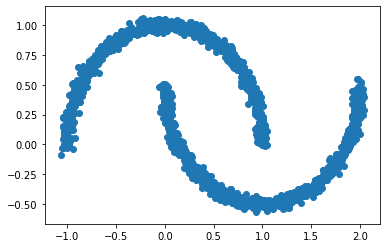

In [175]:
X, y = make_moons(noise=0.03, n_samples=1500)
plt.scatter(X[:, 0], X[:, 1])

Text(0, 0.5, 'Inertia Score')

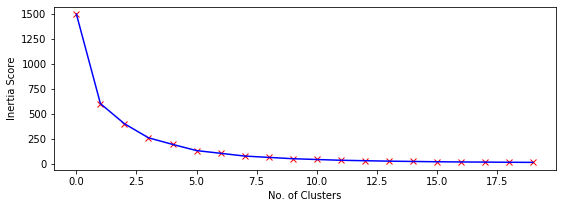

In [154]:
# inertiaScore = []
# for nc in range(1, 21):
#     kmeans = KMeans(n_clusters=nc).fit(X)
#     inertiaScore.append(kmeans.inertia_)
# fig = plt.figure(figsize=(9, 3))
# plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
# plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
# plt.xlabel('No. of Clusters')
# plt.ylabel('Inertia Score')

In [176]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [177]:
X = data[['speed', 'distance']]

In [182]:
minmax = MinMaxScaler()
std_scaler = StandardScaler()

Text(0.5, 1.0, 'ScreePlot-ElbowMethod - MinMaxScaler')

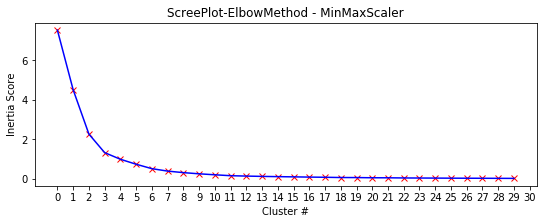

In [215]:
X_mmx = minmax.fit_transform(X)
inertiaScore = []
for nc in range(1, 31):
    kmeans = KMeans(n_clusters=nc, random_state=111).fit(X_mmx)
    inertiaScore.append(kmeans.inertia_)
fig = plt.figure(figsize=(9, 3))
plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
plt.xticks(range(0, len(inertiaScore)+1))
plt.xlabel('Cluster #')
plt.ylabel('Inertia Score')
plt.title('ScreePlot-ElbowMethod - MinMaxScaler')

Text(0.5, 1.0, 'MinMaxScaled')

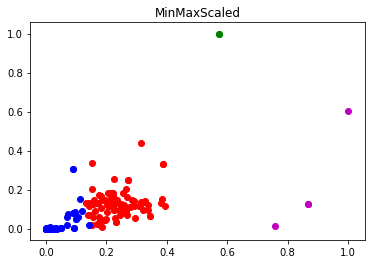

In [218]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=111).fit(X)
X_mmx = np.concatenate((X_mmx, np.array(kmeans.labels_)[:, None]), axis=1)
plt.scatter(X_mmx[X_mmx[:, 2]==1, 0], X_mmx[X_mmx[:, 2]==1, 1], c='r')
plt.scatter(X_mmx[X_mmx[:, 2]==0, 0], X_mmx[X_mmx[:, 2]==0, 1], c='b')
plt.scatter(X_mmx[X_mmx[:, 2]==2, 0], X_mmx[X_mmx[:, 2]==2, 1], c='g')
plt.scatter(X_mmx[X_mmx[:, 2]==3, 0], X_mmx[X_mmx[:, 2]==3, 1], c='m')
plt.title('MinMaxScaled')

Text(0.5, 1.0, 'ScreePlot-ElbowMethod - StandardScaler')

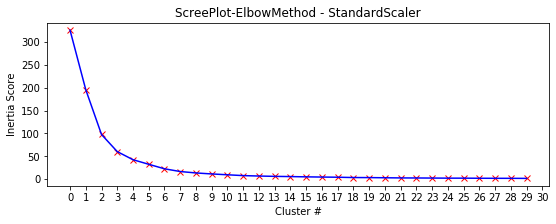

In [219]:
X_ssc = std_scaler.fit_transform(X)
inertiaScore = []
for nc in range(1, 31):
    kmeans = KMeans(n_clusters=nc, random_state=111).fit(X_ssc)
    inertiaScore.append(kmeans.inertia_)
fig = plt.figure(figsize=(9, 3))
plt.plot(range(len(inertiaScore)), inertiaScore, 'rx')
plt.plot(range(len(inertiaScore)), inertiaScore, 'b-')
plt.xticks(range(0, len(inertiaScore)+1))
plt.xlabel('Cluster #')
plt.ylabel('Inertia Score')
plt.title('ScreePlot-ElbowMethod - StandardScaler')


Text(0.5, 1.0, 'StdScaled')

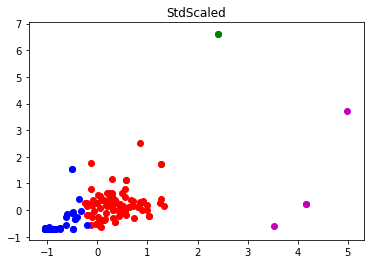

In [221]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=111).fit(X)
X_ssc = np.concatenate((X_ssc, np.array(kmeans.labels_)[:, None]), axis=1)
plt.scatter(X_ssc[X_ssc[:, 2]==1, 0], X_ssc[X_ssc[:, 2]==1, 1], c='r')
plt.scatter(X_ssc[X_ssc[:, 2]==0, 0], X_ssc[X_ssc[:, 2]==0, 1], c='b')
plt.scatter(X_ssc[X_ssc[:, 2]==2, 0], X_ssc[X_ssc[:, 2]==2, 1], c='g')
plt.scatter(X_ssc[X_ssc[:, 2]==3, 0], X_ssc[X_ssc[:, 2]==3, 1], c='m')
plt.title('StdScaled')